In [1]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\Mariana\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mariana\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Mariana\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
dataset= "train-data.csv"
df = pd.read_csv(dataset, delimiter=";")
df

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3,Month 4
0,645874,156160,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-13523,Product Line-4,Division-3,Customer Segmentation-3,Strategic Product Family-12,NaN,may-aug 2021,0,0,0,0
1,469488,224631,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-12778,Product Line-4,Division-3,Customer Segmentation-14,Strategic Product Family-9,NaN,jan-apr 2021,0,1,0,0
2,348904,104047,EUROPE,GB,NL_DC_HLD,Europe Operations,UK and Ireland,United Kingdom,reference-3513,Product Line-3,Division-2,Customer Segmentation-23,Strategic Product Family-7,NaN,jan-apr 2021,0,2,0,0
3,1725822,11823,EAJP,AU,AU_DC_Perth,International Operations,Pacific,Australia,reference-672,Product Line-1,Division-1,Customer Segmentation-11,Strategic Product Family-3,NaN,jan-apr 2023,0,0,0,0
4,404781,159924,EUROPE,ES,NL_DC_HLD,Europe Operations,Iberia,Spain,reference-3496,Product Line-3,Division-2,Customer Segmentation-14,Strategic Product Family-7,NaN,jan-apr 2021,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173341,1285020,60735,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6024,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-12,EOL,may-aug 2022,0,0,0,0
3173342,1527076,57934,NAM,US,US_DC_Athens,North America Operations,US,USA,reference-5672,Product Line-4,Division-3,Customer Segmentation-43,Strategic Product Family-9,NaN,sep-dec 2022,0,0,0,0
3173343,306473,61616,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6241,Product Line-4,Division-3,Customer Segmentation-46,Strategic Product Family-12,NaN,jan-apr 2021,0,0,0,0
3173344,205624,205624,EUROPE,FR,FR_DC_Evreux,France Operations,France,France,reference-11174,Product Line-4,Division-3,Customer Segmentation-1,Strategic Product Family-9,NaN,sep-dec 2020,0,1,0,0


In [4]:
grouped= df.groupby(['Operations', 'Date'])['Month 1','Month 2','Month 3','Month 4'].nunique().reset_index()
grouped['Data_Substr'] = grouped['Date'].str[8:12]

C:\Users\Mariana\AppData\Local\Temp\ipykernel_19364\543058633.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped= df.groupby(['Operations', 'Date'])['Month 1','Month 2','Month 3','Month 4'].nunique().reset_index()


In [5]:
dados_teste= grouped

dados_teste['Sep 2020'] = np.where(dados_teste['Date'] == 'sep-dec 2020', dados_teste['Month 1'], 'Erro')
dados_teste['Oct 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Nov 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') & (dados_teste['Oct 2020'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Dec 2020'] = np.where((dados_teste['Date'] == 'sep-dec 2020') & (dados_teste['Sep 2020'] != 'Erro') & (dados_teste['Oct 2020'] != 'Erro') & (dados_teste['Nov 2020'] != 'Erro'), dados_teste['Month 4'], 'Erro')


dados_teste['Jan 2021'] = np.where(dados_teste['Date'] == 'jan-apr 2021', dados_teste['Month 1'], 'Erro')
dados_teste['Feb 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Mar 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') & (dados_teste['Feb 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Apr 2021'] = np.where((dados_teste['Date'] == 'jan-apr 2021') & (dados_teste['Jan 2021'] != 'Erro') & (dados_teste['Feb 2021'] != 'Erro') & (dados_teste['Mar 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['May 2021'] = np.where(dados_teste['Date'] == 'may-aug 2021', dados_teste['Month 1'], 'Erro')
dados_teste['Jun 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Jul 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') & (dados_teste['Jun 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Aug 2021'] = np.where((dados_teste['Date'] == 'may-aug 2021') & (dados_teste['May 2021'] != 'Erro') & (dados_teste['Jun 2021'] != 'Erro') & (dados_teste['Jul 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Sep 2021'] = np.where(dados_teste['Date'] == 'sep-dec 2021', dados_teste['Month 1'], 'Erro')
dados_teste['Oct 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Nov 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') & (dados_teste['Oct 2021'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Dec 2021'] = np.where((dados_teste['Date'] == 'sep-dec 2021') & (dados_teste['Sep 2021'] != 'Erro') & (dados_teste['Oct 2021'] != 'Erro') & (dados_teste['Nov 2021'] != 'Erro'), dados_teste['Month 4'], 'Erro')


dados_teste['Jan 2022'] = np.where(dados_teste['Date'] == 'jan-apr 2022', dados_teste['Month 1'], 'Erro')
dados_teste['Feb 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Mar 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') & (dados_teste['Feb 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Apr 2022'] = np.where((dados_teste['Date'] == 'jan-apr 2022') & (dados_teste['Jan 2022'] != 'Erro') & (dados_teste['Feb 2022'] != 'Erro') & (dados_teste['Mar 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['May 2022'] = np.where(dados_teste['Date'] == 'may-aug 2022', dados_teste['Month 1'], 'Erro')
dados_teste['Jun 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Jul 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') & (dados_teste['Jun 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Aug 2022'] = np.where((dados_teste['Date'] == 'may-aug 2022') & (dados_teste['May 2022'] != 'Erro') & (dados_teste['Jun 2022'] != 'Erro') & (dados_teste['Jul 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['Sep 2022'] = np.where(dados_teste['Date'] == 'sep-dec 2022', dados_teste['Month 1'], 'Erro')
dados_teste['Oct 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Nov 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') & (dados_teste['Oct 2022'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Dec 2022'] = np.where((dados_teste['Date'] == 'sep-dec 2022') & (dados_teste['Sep 2022'] != 'Erro') & (dados_teste['Oct 2022'] != 'Erro') & (dados_teste['Nov 2022'] != 'Erro'), dados_teste['Month 4'], 'Erro')





dados_teste['Jan 2023'] = np.where(dados_teste['Date'] == 'jan-apr 2023', dados_teste['Month 1'], 'Erro')
dados_teste['Feb 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') , dados_teste['Month 2'], 'Erro')
dados_teste['Mar 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') & (dados_teste['Feb 2023'] != 'Erro'), dados_teste['Month 3'], 'Erro')
dados_teste['Apr 2023'] = np.where((dados_teste['Date'] == 'jan-apr 2023') & (dados_teste['Jan 2023'] != 'Erro') & (dados_teste['Feb 2023'] != 'Erro') & (dados_teste['Mar 2023'] != 'Erro'), dados_teste['Month 4'], 'Erro')
dados_teste['May 2023'] = np.where(dados_teste['Date'] == 'may-jul 2023', dados_teste['Month 2'], 'Erro')
dados_teste['Jun 2023'] = np.where((dados_teste['Date'] == 'may-jul 2023') & (dados_teste['May 2023'] != 'Erro') , dados_teste['Month 3'], 'Erro')
dados_teste['Jul 2023'] = np.where((dados_teste['Date'] == 'may-jul 2023') & (dados_teste['May 2023'] != 'Erro') & (dados_teste['Jun 2023'] != 'Erro'), dados_teste['Month 4'], 'Erro')



In [6]:
dados_teste.replace('Erro', 0, inplace=True)
dados_teste

,Operations,Date,Month 1,Month 2,Month 3,Month 4,Data_Substr,Sep 2020,Oct 2020,Nov 2020,...,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023
0,China Operations,jan-apr 2021,1271,995,1270,1212,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,China Operations,jan-apr 2022,1083,1027,1363,779,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,China Operations,jan-apr 2023,833,992,1427,1087,2023,0,0,0,...,0,0,0,833,992,1427,1087,0,0,0
3,China Operations,may-aug 2021,1311,1357,1055,1108,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,China Operations,may-aug 2022,823,1205,1133,1094,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,China Operations,may-jul 2023,0,1130,1055,926,2023,0,0,0,...,0,0,0,0,0,0,0,1130,1055,926
6,China Operations,sep-dec 2020,1292,961,1100,1086,2020,1292,961,1100,...,0,0,0,0,0,0,0,0,0,0
7,China Operations,sep-dec 2021,1092,914,998,989,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,China Operations,sep-dec 2022,1306,860,984,966,2022,0,0,0,...,860,984,966,0,0,0,0,0,0,0
9,Europe Operations,jan-apr 2021,565,637,700,644,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
columns_to_exclude = ['Month 1', 'Month 2', 'Month 3', 'Month 4','Date','Data_Substr']
dados_teste_filtered = dados_teste.drop(columns=columns_to_exclude)


In [8]:
df=dados_teste_filtered

In [9]:
import pandas as pd

df['Operations'] = df['Operations'].str.strip()
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_grouped = df.groupby('Operations').sum()
df_grouped = df_grouped.transpose()
df_grouped




C:\Users\Mariana\AppData\Local\Temp\ipykernel_19364\585449653.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')


Operations,China Operations,Europe Operations,France Operations,International Operations,North America Operations
Sep 2020,1292,651,321,467,519
Oct 2020,961,621,299,451,521
Nov 2020,1100,632,274,482,506
Dec 2020,1086,580,273,461,488
Jan 2021,1271,565,285,358,512
Feb 2021,995,637,303,434,504
Mar 2021,1270,700,319,524,557
Apr 2021,1212,644,299,442,573
May 2021,1311,683,305,470,570
Jun 2021,1357,723,335,459,609


In [10]:
###Testing stationarity
X = df_grouped['China Operations'].values.flatten()
from statsmodels.tsa.stattools import adfuller # importar o teste ADF
# aplicar ADF e imprimir o resultado
result = adfuller(X)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
    print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -5.4954
Valor-p: 0.0000
Valores Críticos:
	1%: -3.6392
	5%: -2.9512
	10%: -2.6144


In [11]:
# Create a DataFrame
df_grouped["Date"] = df_grouped.index
# Convert 'Date' to datetime format
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'], format='%b %Y')

# Set 'Date' as the index
df_grouped.set_index('Date', inplace=True)



C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


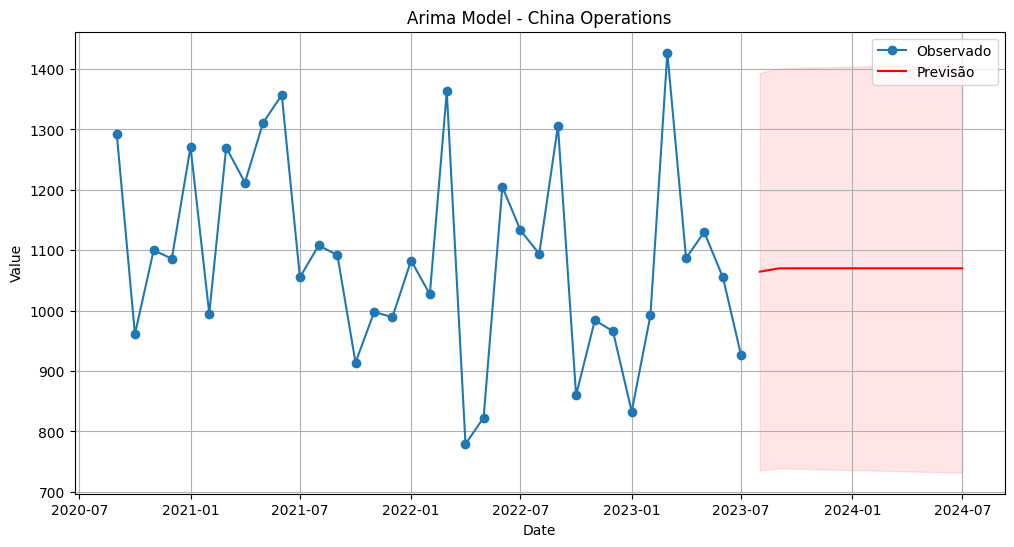

C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


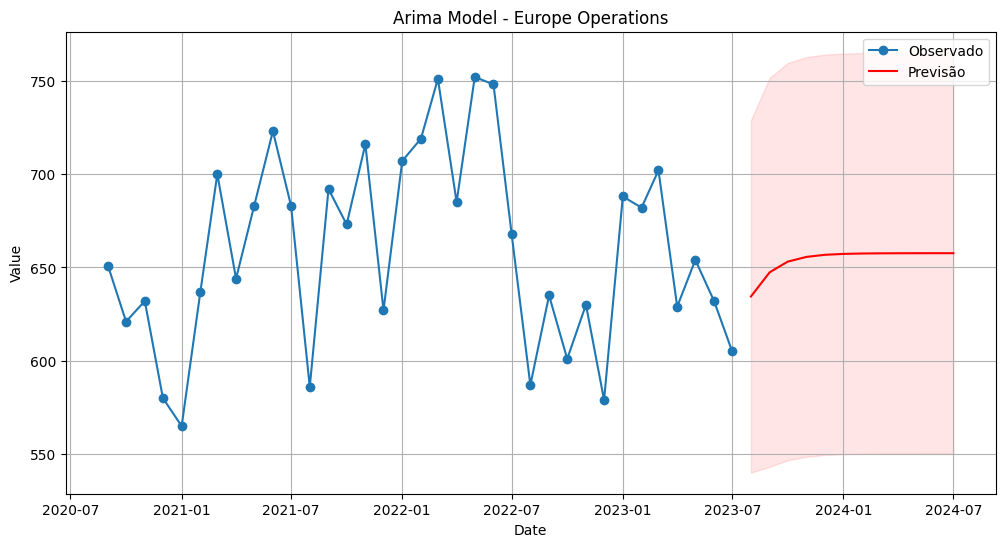

C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


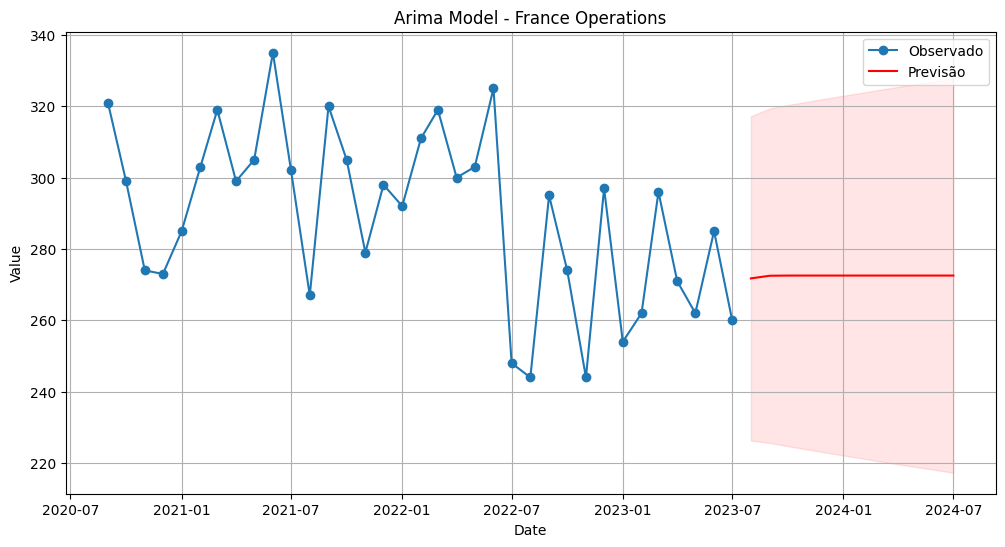

C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


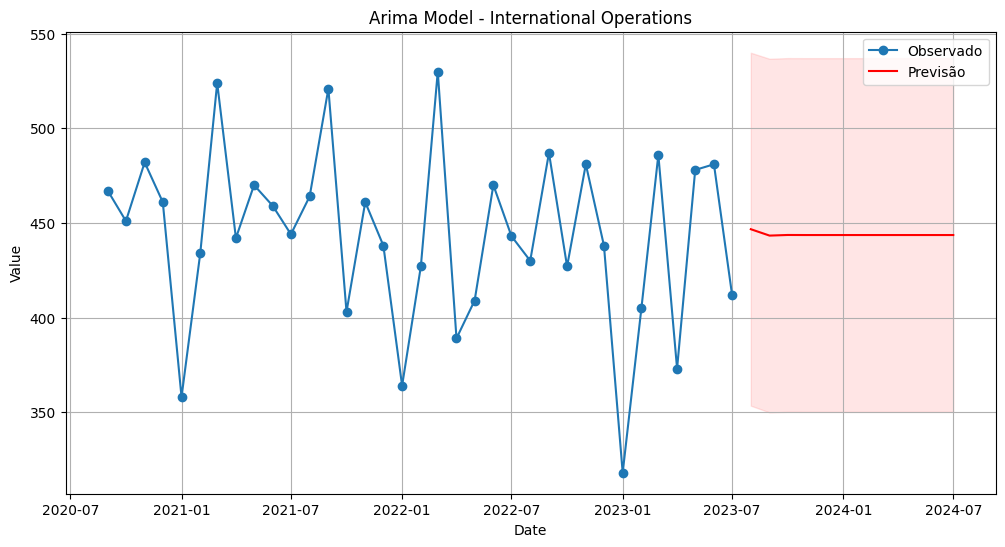

C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


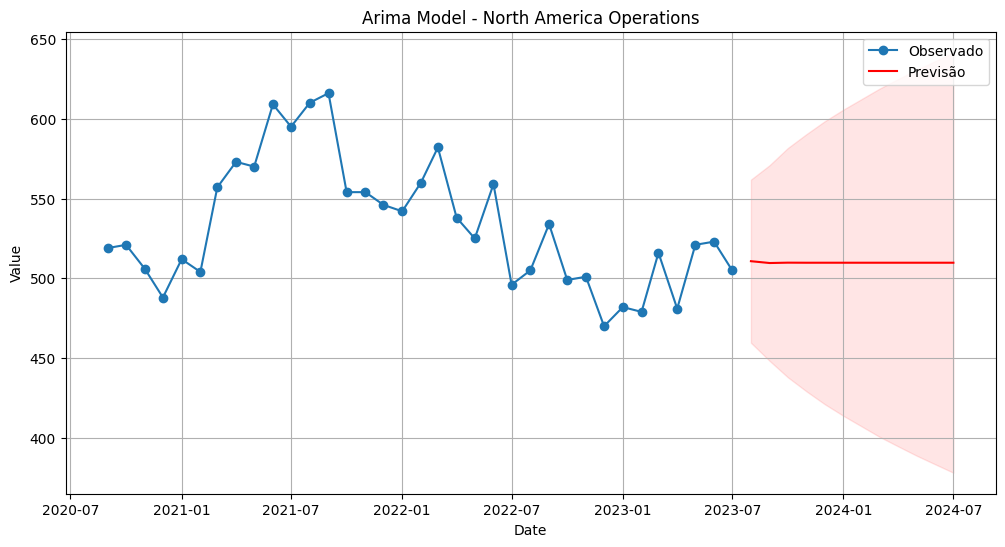

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def plot_arima_forecast(df, column_name, order=(1, 1, 1), forecast_steps=12):
    # Arima Model
    model = ARIMA(df[column_name], order=order)
    results = model.fit()

    # Predictions
    forecast = results.get_forecast(steps=forecast_steps)
    summary_frame = forecast.summary_frame()

    # Results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], label='Observado', marker='o')
    plt.plot(summary_frame.index, summary_frame['mean'], color='red', label='Previsão')
    plt.fill_between(
        summary_frame.index,
        summary_frame['mean_ci_lower'],
        summary_frame['mean_ci_upper'],
        color='r',
        alpha=0.1
    )

    plt.title(f'Arima Model - {column_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


# Assuming you have a DataFrame named df_operations with columns 'Date', 'Europe Operations', 'France Operations', 'International Operations', 'North America Operations'
plot_arima_forecast(df_grouped, 'China Operations', order=(1, 1, 1), forecast_steps=12)
plot_arima_forecast(df_grouped, 'Europe Operations', order=(1, 1, 1), forecast_steps=12)
plot_arima_forecast(df_grouped, 'France Operations', order=(1, 1, 1), forecast_steps=12)
plot_arima_forecast(df_grouped, 'International Operations', order=(1, 1, 1), forecast_steps=12)
plot_arima_forecast(df_grouped, 'North America Operations', order=(1, 1, 1), forecast_steps=12)

C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


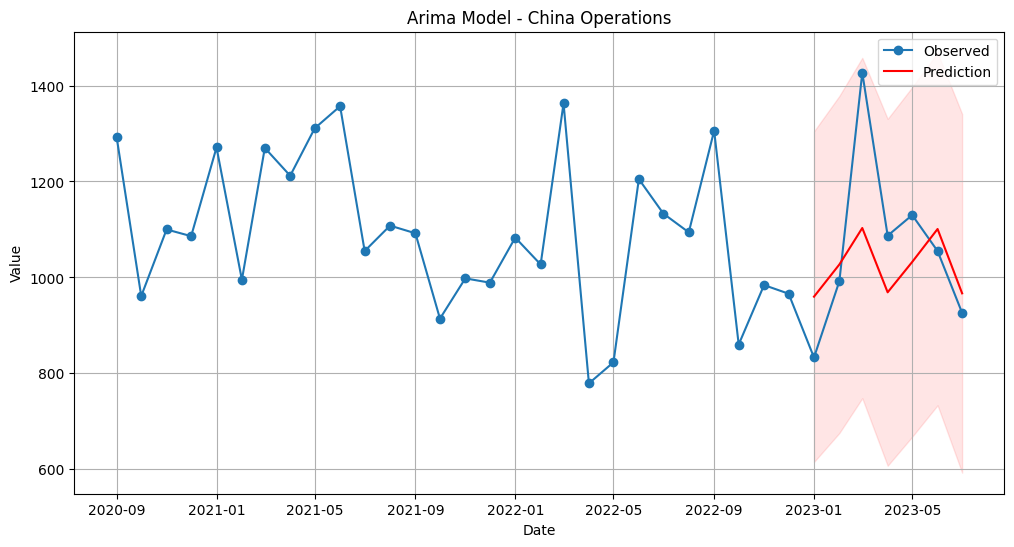

Mean Squared Error on Validation Set: 21364.71098520533


C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


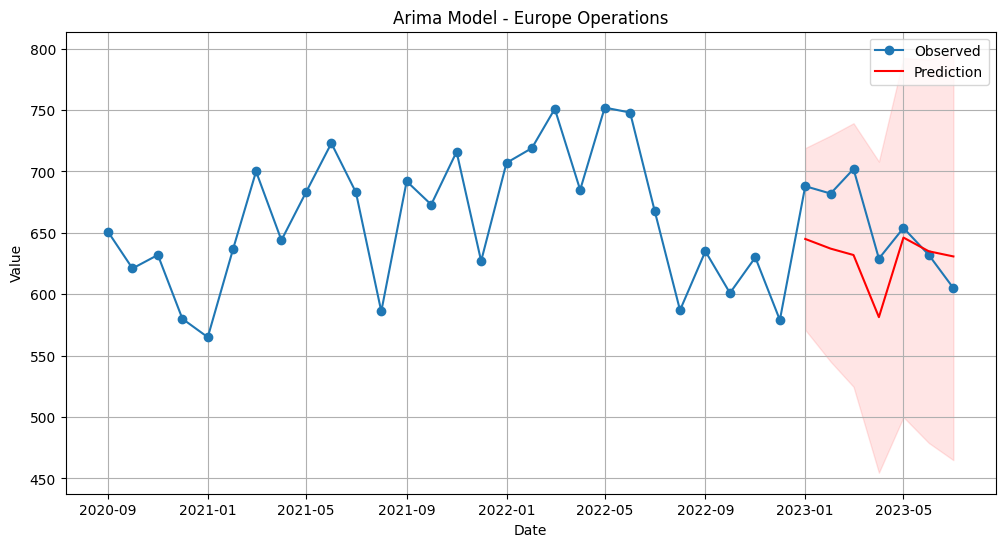

Mean Squared Error on Validation Set: 1681.9333095898678


C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

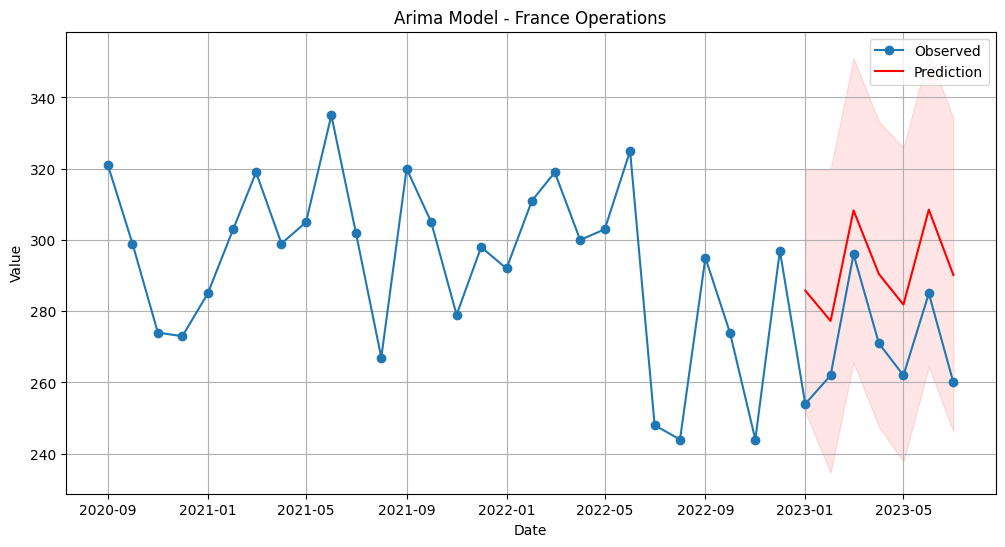

Mean Squared Error on Validation Set: 518.8900452291964


C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to co

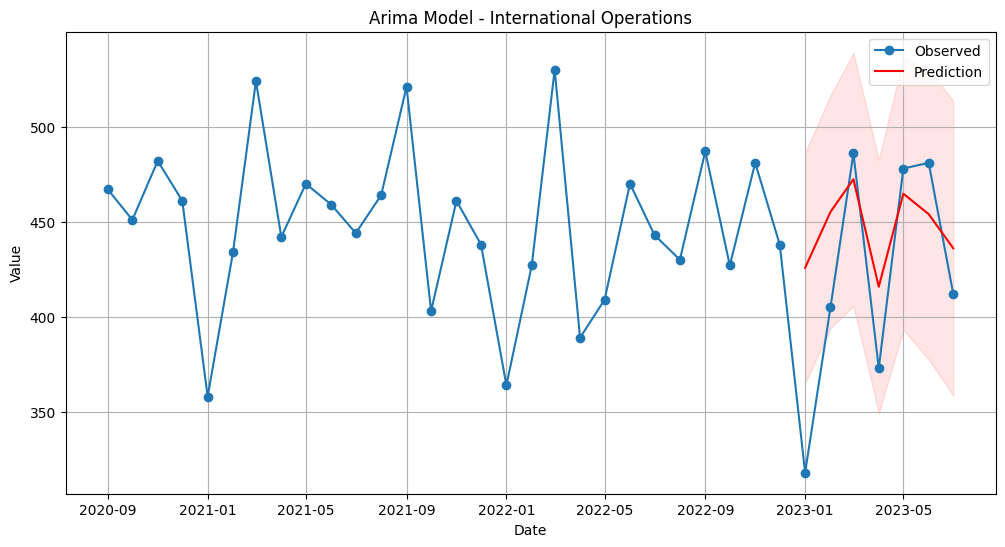

Mean Squared Error on Validation Set: 2518.9738388139745


C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Mariana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


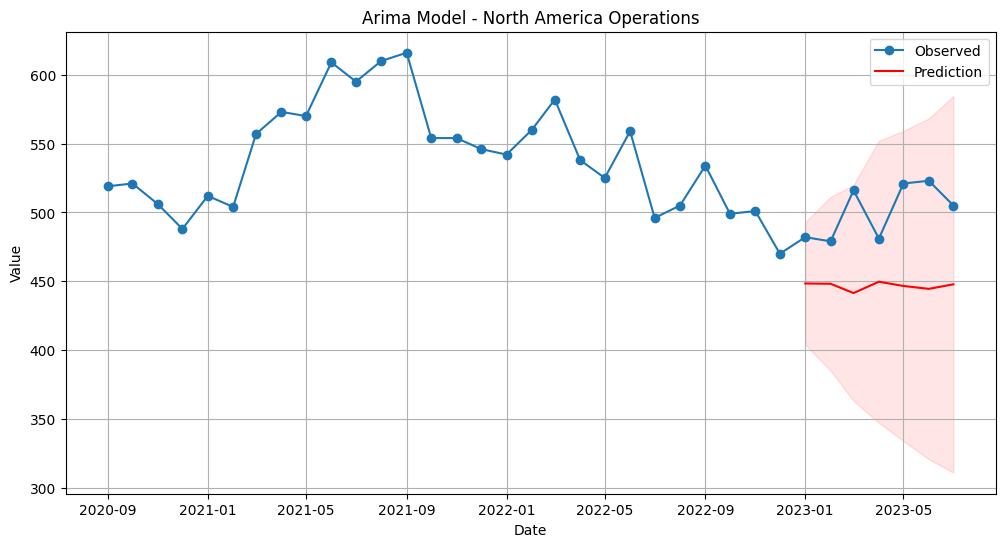

Mean Squared Error on Validation Set: 3372.2315982706496


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_arima_forecast(df, column_name, order=(3, 1, 3), forecast_steps=3, test_size=0.2):
    # Split data into training and validation sets
    train_size = int(len(df) * (1 - test_size))
    train, validation = df.iloc[:train_size], df.iloc[train_size:]

    # Arima Model
    model = ARIMA(train[column_name], order=order)
    results = model.fit()

    # Predictions on the validation set
    forecast = results.get_forecast(steps=len(validation))
    summary_frame = forecast.summary_frame()

    # Results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], label='Observed', marker='o')
    plt.plot(validation.index, summary_frame['mean'], color='red', label='Prediction')
    plt.fill_between(
        validation.index,
        summary_frame['mean_ci_lower'],
        summary_frame['mean_ci_upper'],
        color='r',
        alpha=0.1
    )

    plt.title(f'Arima Model - {column_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate the model on the validation set
    y_true = validation[column_name]
    y_pred = summary_frame['mean']
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error on Validation Set: {mse}')

#each operation
plot_arima_forecast(df_grouped, 'China Operations', order=(3, 1, 3), forecast_steps=3)
plot_arima_forecast(df_grouped, 'Europe Operations', order=(3, 1, 3), forecast_steps=3)
plot_arima_forecast(df_grouped, 'France Operations', order=(3, 1, 3), forecast_steps=3)
plot_arima_forecast(df_grouped, 'International Operations', order=(3, 1, 3), forecast_steps=3)
plot_arima_forecast(df_grouped, 'North America Operations', order=(3, 1, 3), forecast_steps=3)


In [13]:

second=grouped[grouped['Date'].str[0:7]== 'may-aug']
third=grouped[grouped['Date'].str[0:7]== 'may-jul']
fourth=grouped[grouped['Date'].str[0:7]== 'sep-dec']
combined = pd.concat([second, third], ignore_index=True)
first=grouped[grouped['Date'].str[0:7]== 'jan-apr']
first

,Operations,Date,Month 1,Month 2,Month 3,Month 4,Data_Substr,Sep 2020,Oct 2020,Nov 2020,...,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023
0,China Operations,jan-apr 2021,1271,995,1270,1212,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,China Operations,jan-apr 2022,1083,1027,1363,779,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,China Operations,jan-apr 2023,833,992,1427,1087,2023,0,0,0,...,0,0,0,833,992,1427,1087,0,0,0
9,Europe Operations,jan-apr 2021,565,637,700,644,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Europe Operations,jan-apr 2022,707,719,751,685,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Europe Operations,jan-apr 2023,688,682,702,629,2023,0,0,0,...,0,0,0,688,682,702,629,0,0,0
18,France Operations,jan-apr 2021,285,303,319,299,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,France Operations,jan-apr 2022,292,311,319,300,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,France Operations,jan-apr 2023,254,262,296,271,2023,0,0,0,...,0,0,0,254,262,296,271,0,0,0
27,International Operations,jan-apr 2021,358,434,524,442,2021,0,0,0,...,0,0,0,0,0,0,0,0,0,0


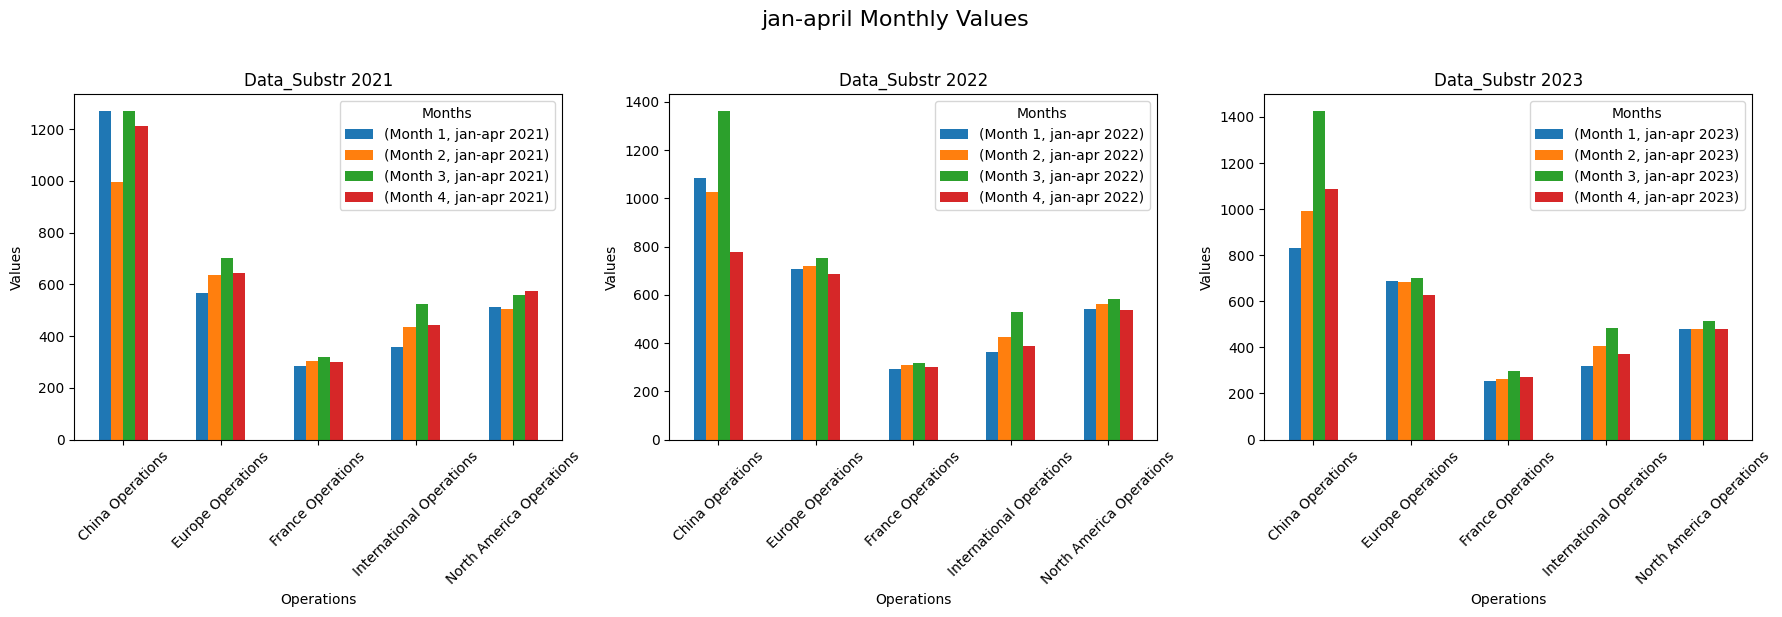

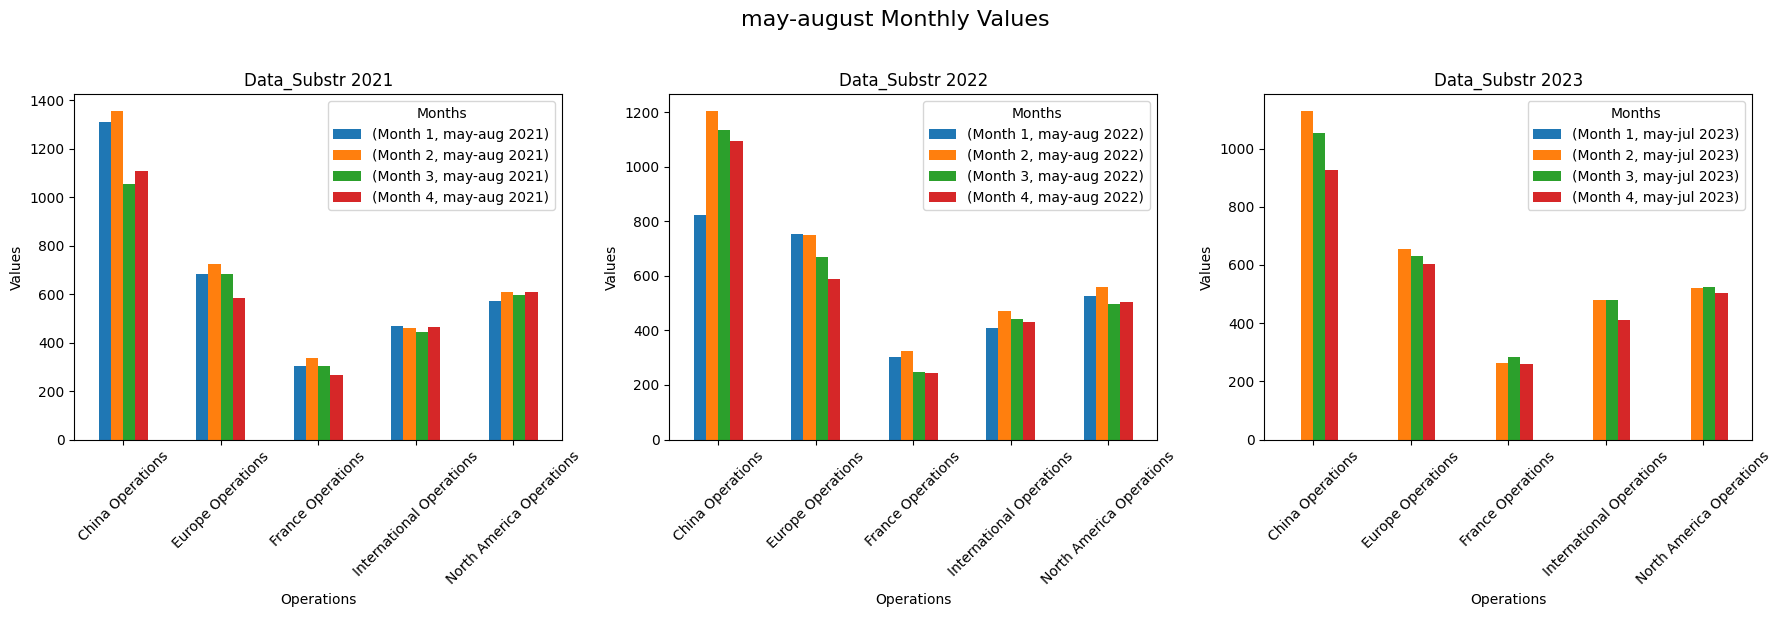

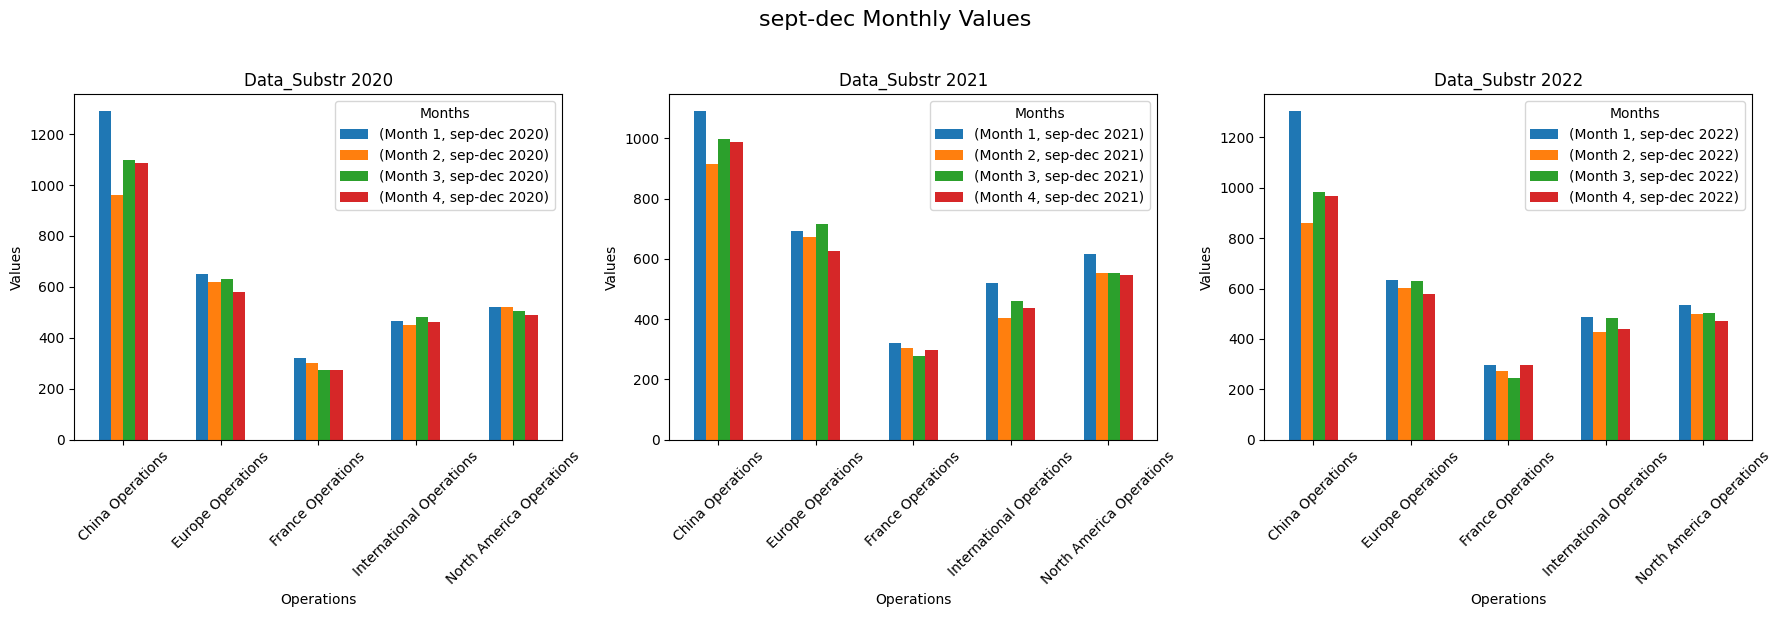

In [14]:
import matplotlib.pyplot as plt

def plot_data_substring(data, title_prefix):
    unique_data_substr = data['Data_Substr'].unique()

    # Calculate the number of rows needed for subplots
    num_rows = (len(unique_data_substr) + 2) // 3  # +2 to ensure rounding up

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    fig.suptitle(f'{title_prefix} Monthly Values', y=1.02, fontsize=16)

    for idx, data_substr in enumerate(unique_data_substr):
        subset_df = data[data['Data_Substr'] == data_substr]
        pivot_df = subset_df.pivot(index='Operations', columns='Date', values=['Month 1', 'Month 2', 'Month 3', 'Month 4'])

        # Calculate the subplot position
        row_idx = idx // 3
        col_idx = idx % 3

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        pivot_df.plot(kind='bar', ax=ax, rot=45)
        ax.set_title(f'Data_Substr {data_substr}')
        ax.set_xlabel('Operations')
        ax.set_ylabel('Values')
        ax.legend(title='Months')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Assuming first, second, and combined are your DataFrames
plot_data_substring(first, 'jan-april')
plot_data_substring(combined, 'may-august')
plot_data_substring(fourth, 'sept-dec')

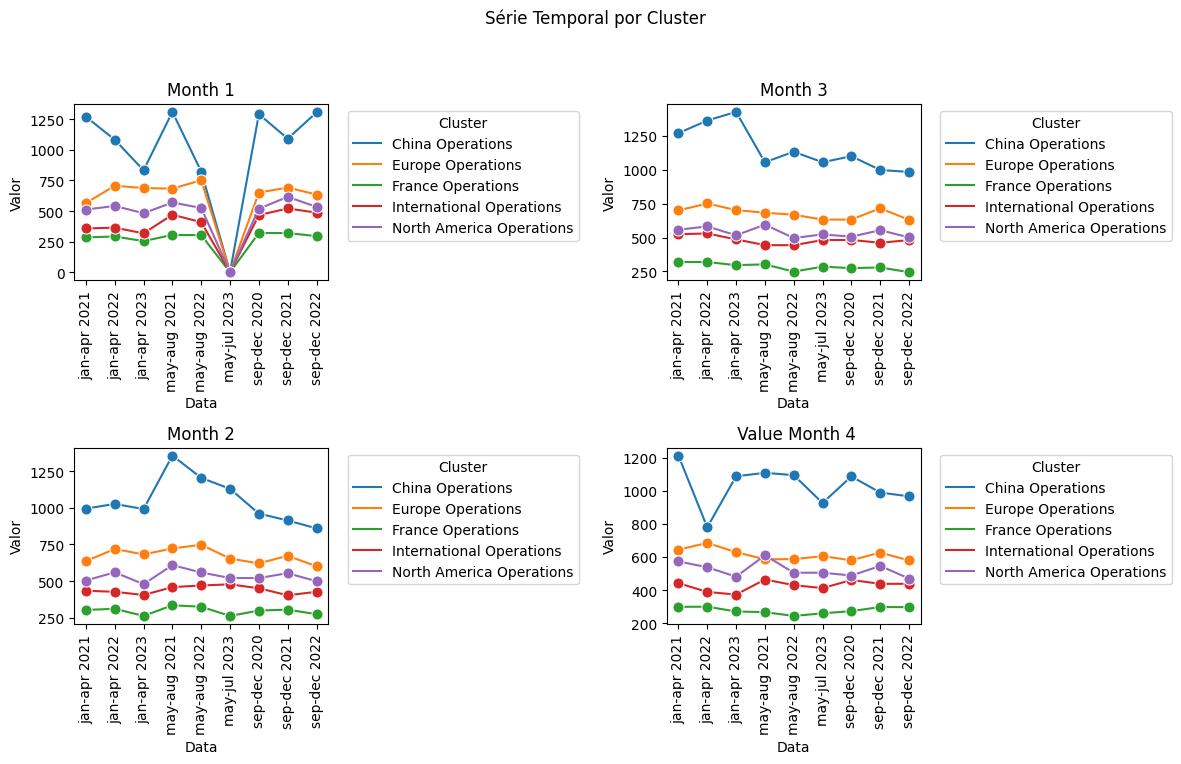

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn

# Supondo que o DataFrame 'df' já tenha as colunas 'Date', 'Month 1', 'Month 2', 'Month 3', 'Month 4', 'Operations'

# Criando dois subplots, cada um com dois meses
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Série Temporal por Cluster')

# Mês 1 e Mês 2
sn.lineplot(x='Date', y='Month 1', hue='Operations', data=grouped, marker='o', linestyle='-', markersize=8, ax=axs[0, 0])
sn.lineplot(x='Date', y='Month 2', hue='Operations', data=grouped, marker='o', linestyle='-', markersize=8, ax=axs[1, 0])
axs[0, 0].set_title('Month 1')
axs[0, 0].set_xlabel('Data')
axs[0, 0].set_ylabel('Valor')
axs[0, 0].legend(title='Cluster',bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1, 0].legend(title='Cluster',bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1, 0].set_title('Month 2')
axs[1, 0].set_xlabel('Data')
axs[1, 0].set_ylabel('Valor')
axs[1, 0].tick_params(axis='x', rotation=90)
axs[0, 0].tick_params(axis='x', rotation=90)

# Mês 3 e Mês 4
sn.lineplot(x='Date', y='Month 3', hue='Operations', data=grouped, marker='o', linestyle='-', markersize=8, ax=axs[0, 1])
sn.lineplot(x='Date', y='Month 4', hue='Operations', data=grouped, marker='o', linestyle='-', markersize=8, ax=axs[1, 1])
axs[0, 1].set_title('Month 3')
axs[0, 1].set_xlabel('Data')
axs[0, 1].set_ylabel('Valor')
axs[0, 1].legend(title='Cluster',bbox_to_anchor=(1.05, 1), loc='upper left')

axs[1, 1].set_title(' Value Month 4')
axs[1, 1].set_xlabel('Data')
axs[1, 1].set_ylabel('Valor')
axs[1, 1].legend(title='Cluster',bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1, 1].tick_params(axis='x', rotation=90)
axs[0, 1].tick_params(axis='x', rotation=90)

# Ajustando o layout para evitar sobreposições
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibindo os gráficos
plt.show()
